In [2]:
from WindPy import w
w.start() # 默认命令超时时间为120秒，如需设置超时时间可以加入waitTime参数，例如waitTime=60,即设置命令超时时间为60秒  

w.isconnected() # 判断WindPy是否已经登录成功

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2020 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


True

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# 绘制选定股票价格与时间的关系

In [114]:
#输入变量

btime = '20190925'
ctime = '20200925'
name = "600109.SH"

cls = w.wsd(name, "close", beginTime = btime, endTime = ctime)
opn = w.wsd(name, "open", beginTime = btime, endTime = ctime)

<function matplotlib.pyplot.show(*args, **kw)>

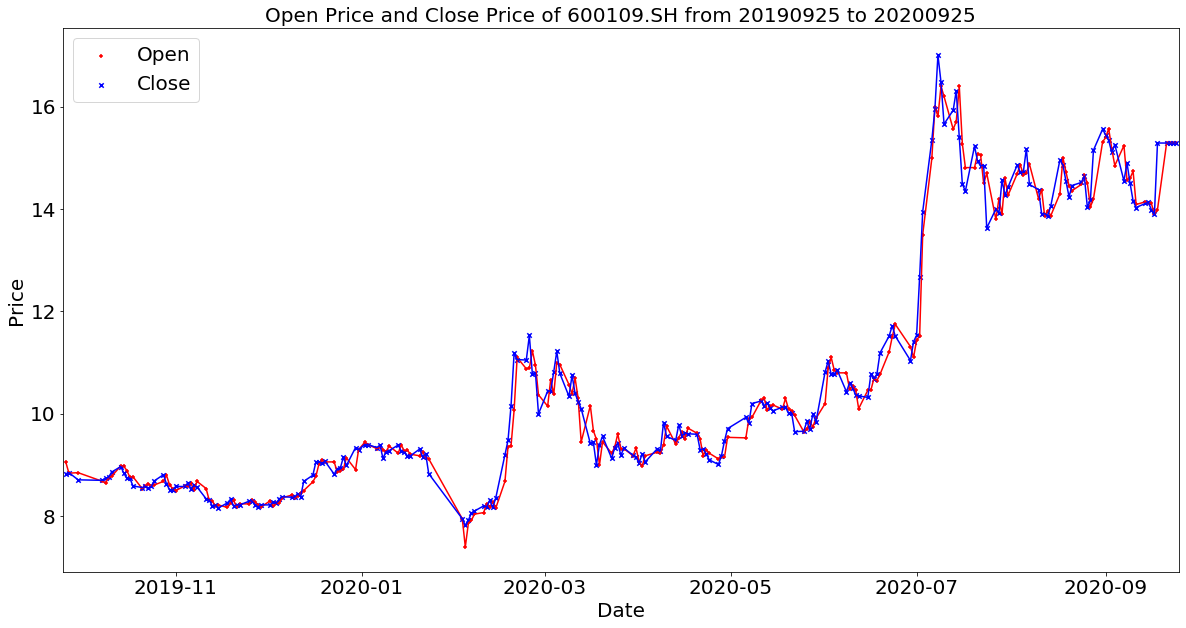

In [117]:
图像绘制

plt.figure(figsize=(20,10))

p_o = plt.scatter(opn.Times[1:-1], opn.Data[0][1:-1], marker = '+', color = 'r', s = 20)
plt.plot(opn.Times[1:-1], opn.Data[0][1:-1], color = 'r')
p_c = plt.scatter(cls.Times[1:-1], cls.Data[0][1:-1], marker = 'x', color = 'b', s = 20)
plt.plot(cls.Times[1:-1], cls.Data[0][1:-1], color = 'b')
plt.tick_params(axis='both',which='major',labelsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Price',fontsize = 20)
plt.xlim ([opn.Times[0], opn.Times[-1]])
plt.title("Open Price and Close Price of " + str(name) + " from " + str(btime) + " to " + str(ctime), size = 20)
plt.legend((p_o, p_c), ('Open', 'Close'), loc = 2, fontsize = 20)


plt.show